# Đọc dữ liệu và tải các thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tải các thư viện

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

Import data and tranform from `*.csv` type to `dataframe` type

In [ ]:
file_train = '/content/drive/MyDrive/BTL_KPDL_Banking/train.csv'
file_test = '/content/drive/MyDrive/BTL_KPDL_Banking/test.csv'

df_train = pd.read_csv(file_train, delimiter = ';', header = 0)
df_test = pd.read_csv(file_test, delimiter = ';', header = 0)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
print(df_train)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
print(df_test)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [ ]:
df_train.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [ ]:
df_test.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


**Trực quan hóa một vài thuộc tính của bộ dữ liệu `df_train`**

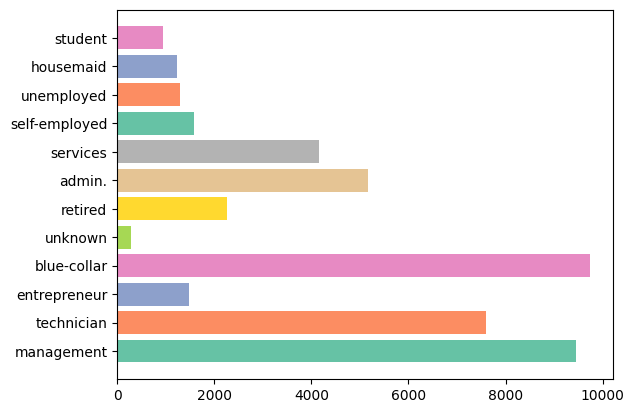

In [ ]:
y_barCol = {}
for x in df_train['job'].unique():
  y_barCol[x] = df_train[df_train['job'] == x].count()['job']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_train['job'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

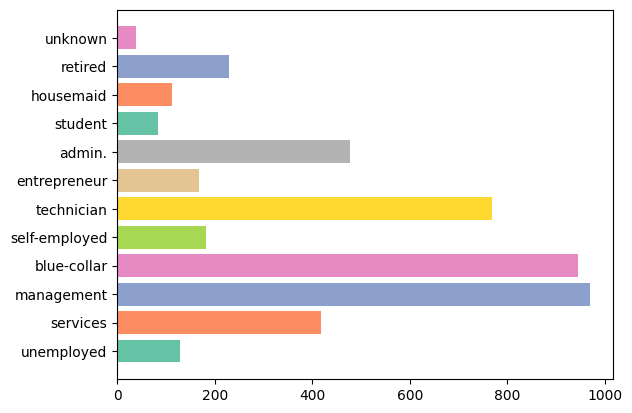

In [ ]:
y_barCol = {}
for x in df_test['job'].unique():
  y_barCol[x] = df_test[df_test['job'] == x].count()['job']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_test['job'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

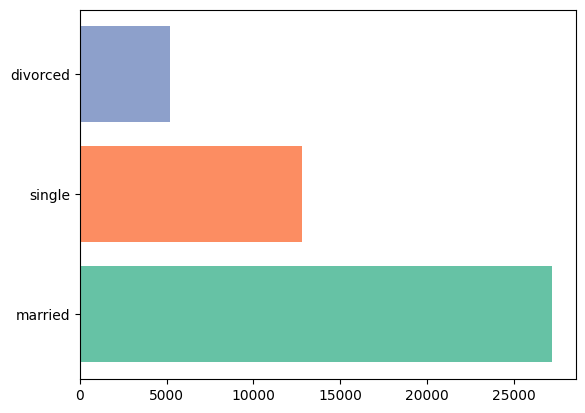

In [ ]:
y_barCol = {}
for x in df_train['marital'].unique():
  y_barCol[x] = df_train[df_train['marital'] == x].count()['marital']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_train['marital'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

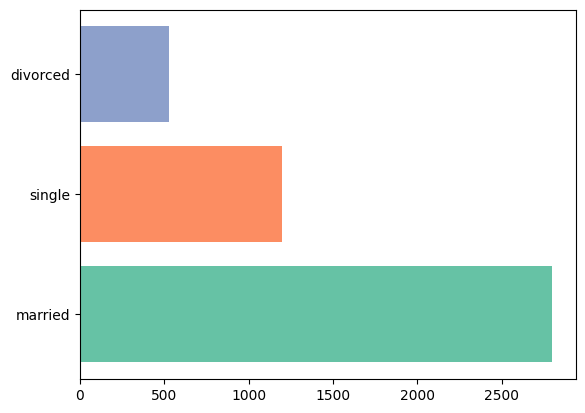

In [ ]:
y_barCol = {}
for x in df_test['marital'].unique():
  y_barCol[x] = df_test[df_test['marital'] == x].count()['marital']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_test['marital'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

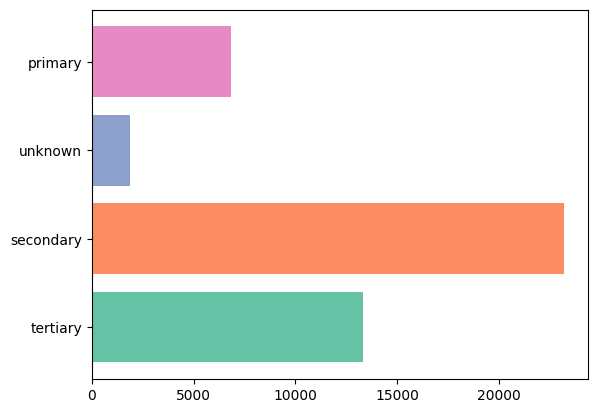

In [ ]:
y_barCol = {}
for x in df_train['education'].unique():
  y_barCol[x] = df_train[df_train['education'] == x].count()['education']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_train['education'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

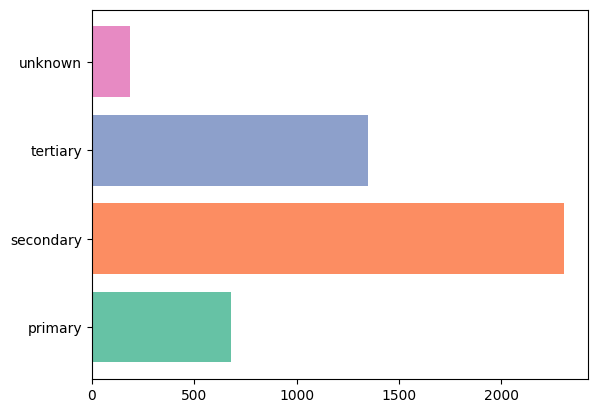

In [ ]:
y_barCol = {}
for x in df_test['education'].unique():
  y_barCol[x] = df_test[df_test['education'] == x].count()['education']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_test['education'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 5))
#dict(sorted(df_train['age'].value_counts().items())).plot(kind='bar', rot='horizontal')
type(df_train['age'].value_counts())

pandas.core.series.Series

<Figure size 2000x500 with 0 Axes>

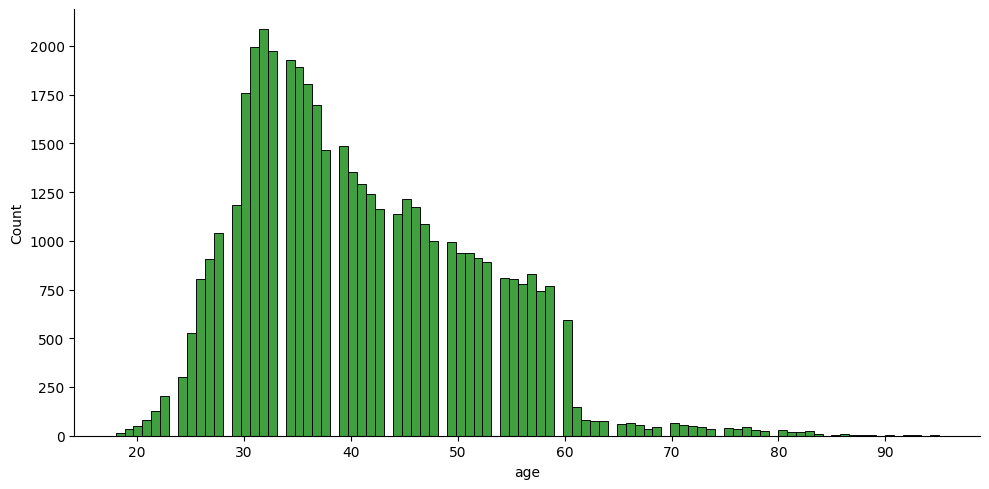

In [ ]:
sns.displot(data=df_train, x='age', height=5, aspect=2, color='green')

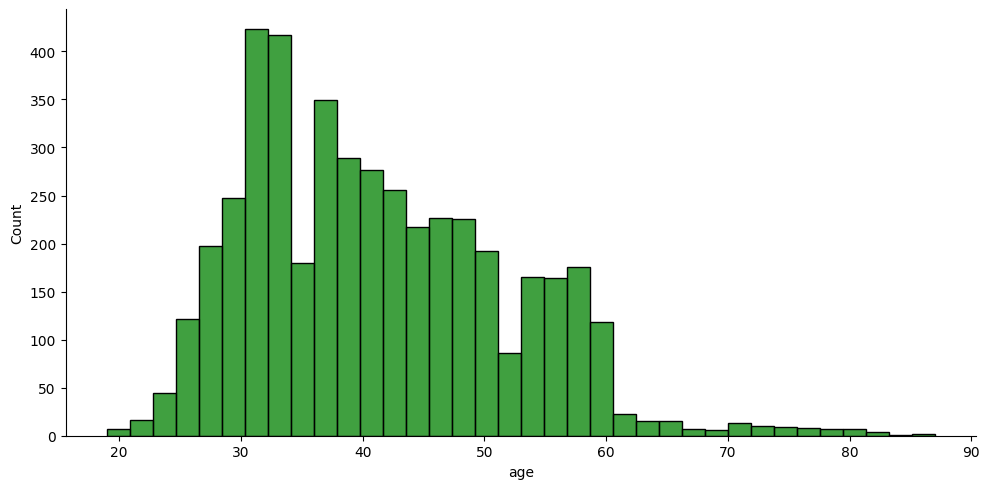

In [ ]:
sns.displot(data=df_test, x='age', height=5, aspect=2, color='green')

<Axes: >

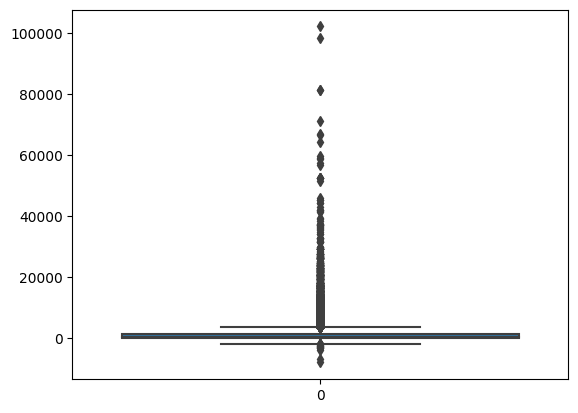

In [ ]:
sns.boxplot(df_train['balance'])

<Axes: >

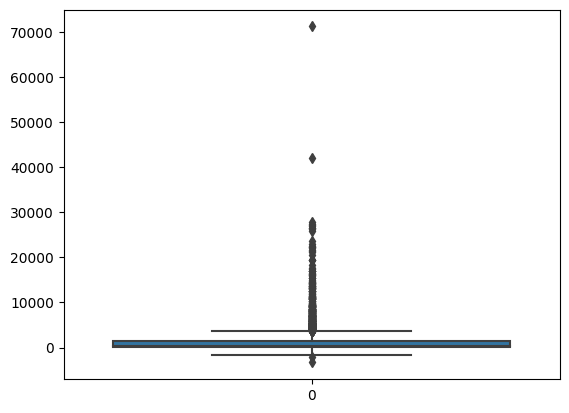

In [ ]:
sns.boxplot(df_test['balance'])

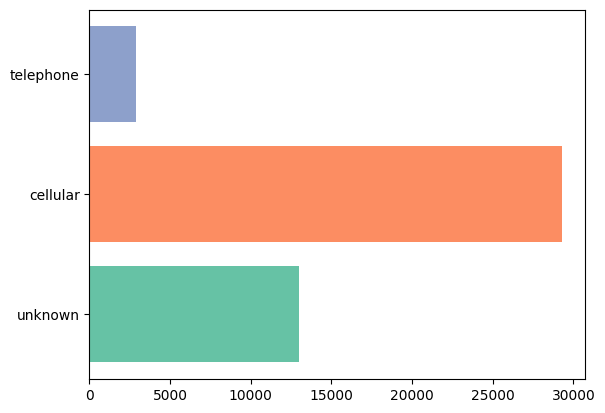

In [ ]:
y_barCol = {}
for x in df_train['contact'].unique():
  y_barCol[x] = df_train[df_train['contact'] == x].count()['contact']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_train['contact'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

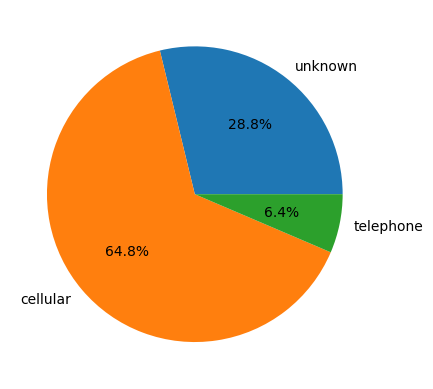

In [ ]:
y_barCol = {}
for x in df_train['contact'].unique():
  y_barCol[x] = df_train[df_train['contact'] == x].count()['contact']

plt.pie(y_barCol.values(), labels = df_train['contact'].unique(), autopct='%1.1f%%')
plt.show()

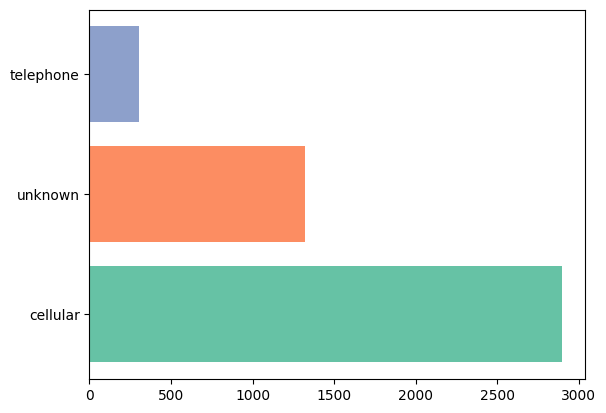

In [ ]:
y_barCol = {}
for x in df_test['contact'].unique():
  y_barCol[x] = df_test[df_test['contact'] == x].count()['contact']

my_cmap = plt.get_cmap('Set2')
plt.barh(df_test['contact'].unique(), y_barCol.values(), color = my_cmap.colors)
plt.show()

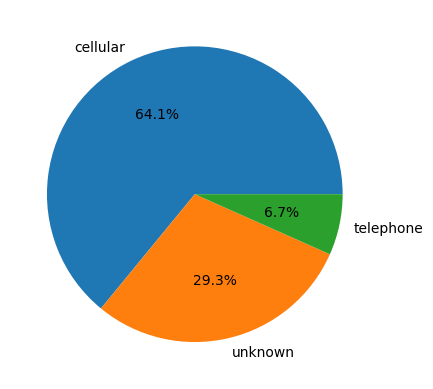

In [ ]:
y_barCol = {}
for x in df_test['contact'].unique():
  y_barCol[x] = df_test[df_test['contact'] == x].count()['contact']

plt.pie(y_barCol.values(), labels = df_test['contact'].unique(), autopct='%1.1f%%')
plt.show()

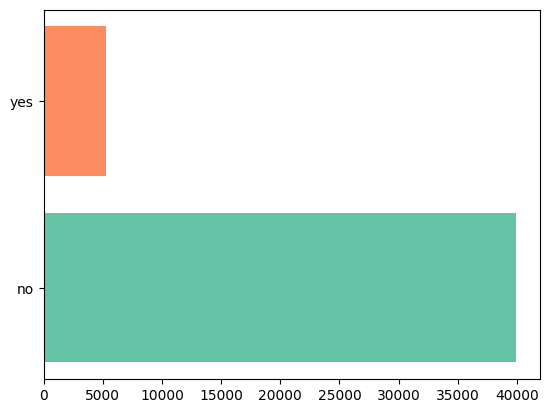

In [ ]:
my_cmap = plt.get_cmap('Set2')
plt.barh(label.value_counts().index, label.value_counts().values, color = my_cmap.colors)
plt.show()

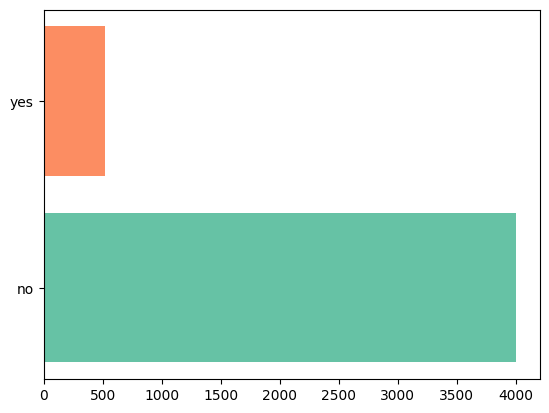

In [ ]:
my_cmap = plt.get_cmap('Set2')
plt.barh(label_test.value_counts().index, label_test.value_counts().values, color = my_cmap.colors)
plt.show()

# Tiền xử lý dữ liệu

Xóa các cột không cần thiết

In [ ]:
df_train = df_train.drop(columns='contact')
label = df_train['y']
df_train = df_train.drop(columns='y')

In [ ]:
label

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [ ]:
print(df_train)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day month  duration  campaign  pdays  previo

In [ ]:
df_test = df_test.drop(columns='contact')
label_test = df_test['y']
df_test = df_test.drop(columns='y')

In [ ]:
label_test

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
dtypes: int64(7), object(8)
memory usage: 529.9+ KB


In [ ]:
print(df_test)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

      day month  duration  campaign  pdays  previous poutcome  

Đổi giá trị của các cột `default`, `housing`, `loan` từ yes/no thành true/false

In [ ]:
df_train['default'] = df_train['default'].replace('yes', True)
df_train['default'] = df_train['default'].replace('no', False)

df_train['housing'] = df_train['housing'].replace('no', False)
df_train['housing'] = df_train['housing'].replace('yes', True)

df_train['loan'] = df_train['loan'].replace('no', False)
df_train['loan'] = df_train['loan'].replace('yes', True)

In [ ]:
df_test['default'] = df_test['default'].replace('yes', True)
df_test['default'] = df_test['default'].replace('no', False)

df_test['housing'] = df_test['housing'].replace('no', False)
df_test['housing'] = df_test['housing'].replace('yes', True)

df_test['loan'] = df_test['loan'].replace('no', False)
df_test['loan'] = df_test['loan'].replace('yes', True)

Đếm số dòng dữ liệu trùng lặp

In [ ]:
duplicated_rows = df_train[df_train.duplicated()]
print(len(duplicated_rows))

0


In [ ]:
duplicated_rows = df_test[df_test.duplicated()]
print(len(duplicated_rows))

0


# Thực hiện gom cụm bằng thuật toán K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

Tìm các cột có dữ liệu kiểu *category*

In [ ]:
categorical_cols = [col for col in df_train.columns if df_train[col].dtype=='O']
print(categorical_cols) 	##in các cột dữ liệu dạng category

['job', 'marital', 'education', 'month', 'poutcome']


Mã hóa dữ liệu không phải số bằng `LabelEncoder`


In [ ]:
df_kmeans = df_train.copy(deep = True)
le = LabelEncoder()
for col in categorical_cols:
  df_kmeans[col] = le.fit_transform(df_kmeans[col])

Bảng dữ liệu sau khi mã hóa:

In [ ]:
df_kmeans

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,False,2143,True,False,5,8,261,1,-1,0,3
1,44,9,2,1,False,29,True,False,5,8,151,1,-1,0,3
2,33,2,1,1,False,2,True,True,5,8,76,1,-1,0,3
3,47,1,1,3,False,1506,True,False,5,8,92,1,-1,0,3
4,33,11,2,3,False,1,False,False,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,False,825,False,False,17,9,977,3,-1,0,3
45207,71,5,0,0,False,1729,False,False,17,9,456,2,-1,0,3
45208,72,5,1,1,False,5715,False,False,17,9,1127,5,184,3,2
45209,57,1,1,1,False,668,False,False,17,9,508,4,-1,0,3


In [ ]:
for col in categorical_cols:
  print(col, ': ', df_train[col].unique())

job :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital :  ['married' 'single' 'divorced']
education :  ['tertiary' 'secondary' 'unknown' 'primary']
month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome :  ['unknown' 'failure' 'other' 'success']


In [ ]:
for col in categorical_cols:
  print(col, ': ', df_kmeans[col].unique())

job :  [ 4  9  2  1 11  5  0  7  6 10  3  8]
marital :  [1 2 0]
education :  [2 1 3 0]
month :  [ 8  6  5  1 10  9  2  4  3  7  0 11]
poutcome :  [3 0 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

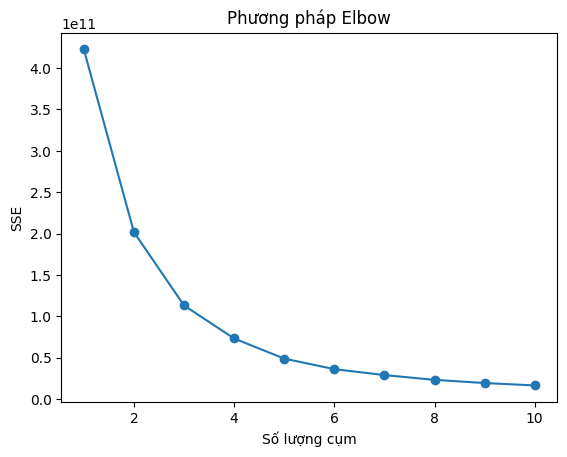

In [ ]:
max_clusters = 10  # Số cụm tối đa muốn xem
sse = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans)
    sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

In [ ]:
# Số cụm tối ưu dựa trên biểu đồ Elbow
num_clusters = 4

# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_kmeans)

# Gán nhãn cụm cho dữ liệu
df_kmeans['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


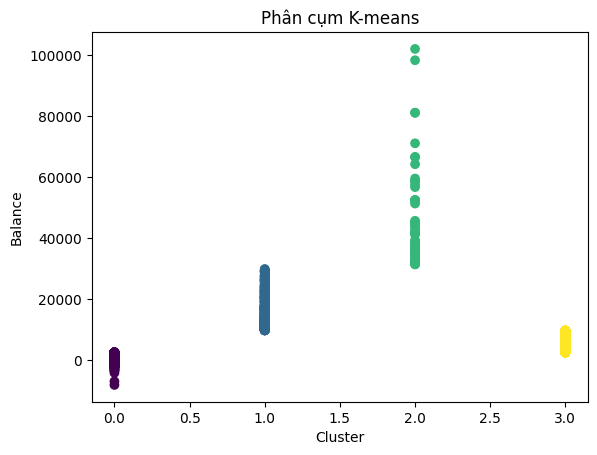

In [ ]:
# Vẽ biểu đồ phân cụm
plt.scatter(df_kmeans['Cluster'], df_kmeans['balance'], c=df_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.title('Phân cụm K-means')
plt.show()

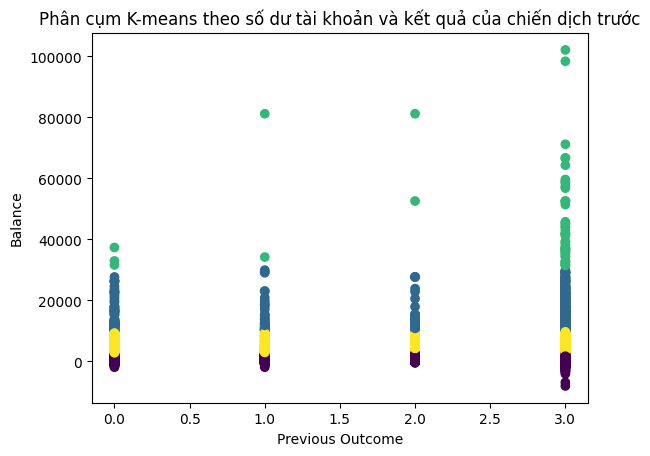

In [ ]:
# Vẽ biểu đồ phân cụm theo số dư tài khoản và kết quả của chiến dịch trước
plt.scatter(df_kmeans['poutcome'], df_kmeans['balance'], c=df_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Previous Outcome')
plt.ylabel('Balance')
plt.title('Phân cụm K-means theo số dư tài khoản và kết quả của chiến dịch trước')
plt.show()

# Luật kết hợp

In [ ]:
df_ap = df_train.copy(deep=True)
df_ap = df_ap.drop(columns=['age', 'duration', 'day', 'month', 'campaign', 'pdays', 'previous', 'housing', 'loan'])
df_ap.head()

,job,marital,education,default,balance,poutcome
0,management,married,tertiary,False,2143,unknown
1,technician,single,secondary,False,29,unknown
2,entrepreneur,married,secondary,False,2,unknown
3,blue-collar,married,unknown,False,1506,unknown
4,unknown,single,unknown,False,1,unknown


In [ ]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  bool  
 4   balance    45211 non-null  int64 
 5   poutcome   45211 non-null  object
dtypes: bool(1), int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
transactions = []
for i in range(0, len(df_train)):
    transactions.append([str(df_ap.values[i, j]) for j in range(0, 6)])

In [ ]:
print(transactions[:2])

[['management', 'married', 'tertiary', 'False', '2143', 'unknown'], ['technician', 'single', 'secondary', 'False', '29', 'unknown']]


In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.01, min_confidence = 0.6, min_lift = 3, min_length = 2)
results = list(rules)

In [ ]:
results = pd.DataFrame(results)
results

# Gaussian Naive Bayes

In [ ]:
X = df_train.copy(deep=True)
Y = label

In [ ]:
categorical_cols = [col for col in df_train.columns if df_train[col].dtype=='O']
print(categorical_cols) 	##in các cột dữ liệu dạng category

['job', 'marital', 'education', 'month', 'poutcome']


In [ ]:
le = LabelEncoder()
for col in categorical_cols:
  X[col] = le.fit_transform(X[col])

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,False,2143,True,False,5,8,261,1,-1,0,3
1,44,9,2,1,False,29,True,False,5,8,151,1,-1,0,3
2,33,2,1,1,False,2,True,True,5,8,76,1,-1,0,3
3,47,1,1,3,False,1506,True,False,5,8,92,1,-1,0,3
4,33,11,2,3,False,1,False,False,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,False,825,False,False,17,9,977,3,-1,0,3
45207,71,5,0,0,False,1729,False,False,17,9,456,2,-1,0,3
45208,72,5,1,1,False,5715,False,False,17,9,1127,5,184,3,2
45209,57,1,1,1,False,668,False,False,17,9,508,4,-1,0,3


In [ ]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
print(df_train['job'].unique())
print(X['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
[ 4  9  2  1 11  5  0  7  6 10  3  8]


In [ ]:
nb_test = df_test.copy(deep=True)
enc_list = []
for col in categorical_cols:
  enc = {}
  for x in range(0, len(df_train[col].unique())):
    enc[df_train[col].unique()[x]] = X[col].unique()[x]
  enc_list.append(enc)

print(enc_list[0])

{'management': 4, 'technician': 9, 'entrepreneur': 2, 'blue-collar': 1, 'unknown': 11, 'retired': 5, 'admin.': 0, 'services': 7, 'self-employed': 6, 'unemployed': 10, 'housemaid': 3, 'student': 8}


In [ ]:
nb_test = df_test.copy(deep=True)
for col in range(0, len(categorical_cols)):
  for r in range(0, len(nb_test[categorical_cols[col]])):
    nb_test.at[r, categorical_cols[col]] = enc_list[col][nb_test.at[r, categorical_cols[col]]]

In [ ]:
nb_test

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,False,1787,False,False,19,10,79,1,-1,0,3
1,33,7,1,1,False,4789,True,True,11,8,220,1,339,4,0
2,35,4,2,2,False,1350,True,False,16,0,185,1,330,1,0
3,30,4,1,2,False,1476,True,True,3,6,199,4,-1,0,3
4,59,1,1,1,False,0,True,False,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,False,-333,True,False,30,5,329,5,-1,0,3
4517,57,6,1,2,True,-3313,True,True,9,8,153,1,-1,0,3
4518,57,9,1,1,False,295,False,False,19,1,151,11,-1,0,3
4519,28,1,1,1,False,1137,False,False,6,3,129,4,211,3,1


In [ ]:
print(df_test['job'].unique())
print(nb_test['job'].unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
[10 7 4 1 6 9 2 0 8 3 5 11]


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()

result_nb = clf.predict(nb_test)
print(result_nb)

['no' 'no' 'yes' ... 'no' 'no' 'no']


In [ ]:
nb_test = df_test.copy(deep = True)
nb_test.insert(15, 'new_y', result_nb, True)
nb_test

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,new_y
0,30,unemployed,married,primary,False,1787,False,False,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,False,4789,True,True,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,False,1350,True,False,16,apr,185,1,330,1,failure,yes
3,30,management,married,tertiary,False,1476,True,True,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,False,0,True,False,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,False,-333,True,False,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,True,-3313,True,True,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,False,295,False,False,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,False,1137,False,False,6,feb,129,4,211,3,other,no


Gom cụm thể hiện mối tương quan giữa các thuộc tính trong nb_test

In [ ]:
nb_kmeans = nb_test.copy(deep = True)
le = LabelEncoder()
for col in categorical_cols:
  nb_kmeans[col] = le.fit_transform(nb_kmeans[col])
nb_kmeans['new_y'] = le.fit_transform(nb_kmeans['new_y'])

In [ ]:
nb_kmeans

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,new_y
0,30,10,1,0,False,1787,False,False,19,10,79,1,-1,0,3,0
1,33,7,1,1,False,4789,True,True,11,8,220,1,339,4,0,0
2,35,4,2,2,False,1350,True,False,16,0,185,1,330,1,0,1
3,30,4,1,2,False,1476,True,True,3,6,199,4,-1,0,3,0
4,59,1,1,1,False,0,True,False,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,False,-333,True,False,30,5,329,5,-1,0,3,0
4517,57,6,1,2,True,-3313,True,True,9,8,153,1,-1,0,3,0
4518,57,9,1,1,False,295,False,False,19,1,151,11,-1,0,3,0
4519,28,1,1,1,False,1137,False,False,6,3,129,4,211,3,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

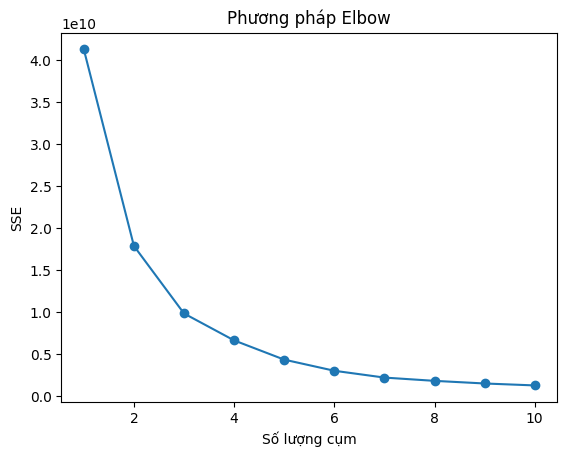

In [ ]:
max_clusters = 10  # Số cụm tối đa muốn xem
sse = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nb_kmeans)
    sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

In [ ]:
# Số cụm tối ưu dựa trên biểu đồ Elbow
num_clusters = 4

# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(nb_kmeans)

# Gán nhãn cụm cho dữ liệu
nb_kmeans['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


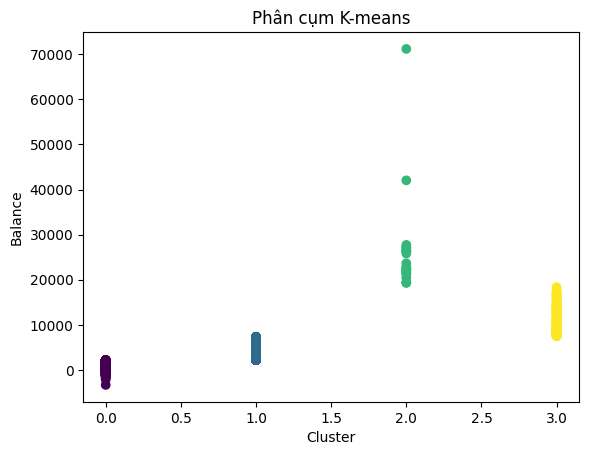

In [ ]:
plt.scatter(nb_kmeans['Cluster'], nb_kmeans['balance'], c=nb_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.title('Phân cụm K-means')
plt.show()

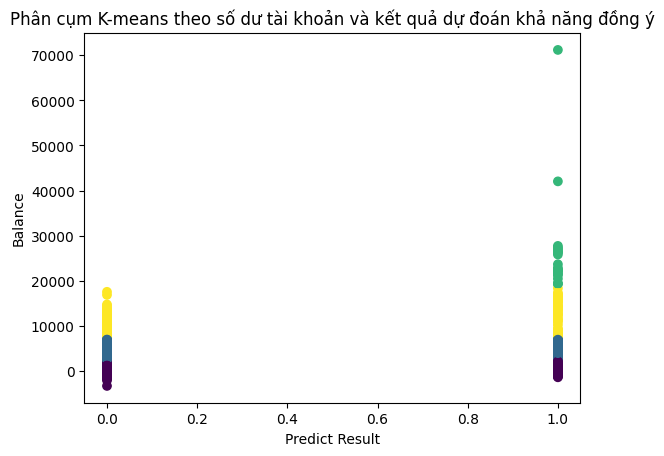

In [ ]:
plt.scatter(nb_kmeans['new_y'], nb_kmeans['balance'], c=nb_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Predict Result')
plt.ylabel('Balance')
plt.title('Phân cụm K-means theo số dư tài khoản và kết quả dự đoán khả năng đồng ý')
plt.show()

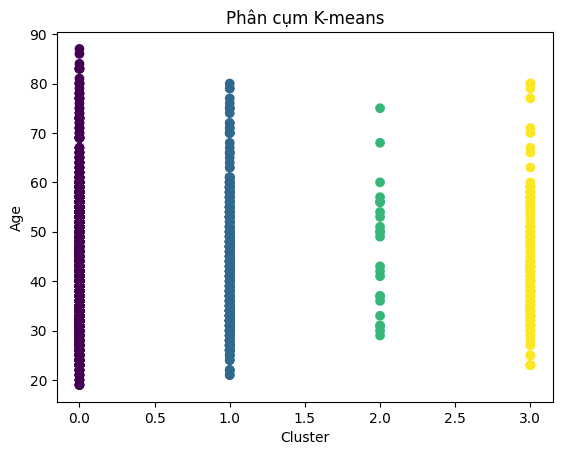

In [ ]:
plt.scatter(nb_kmeans['Cluster'], nb_kmeans['age'], c=nb_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Phân cụm K-means')
plt.show()

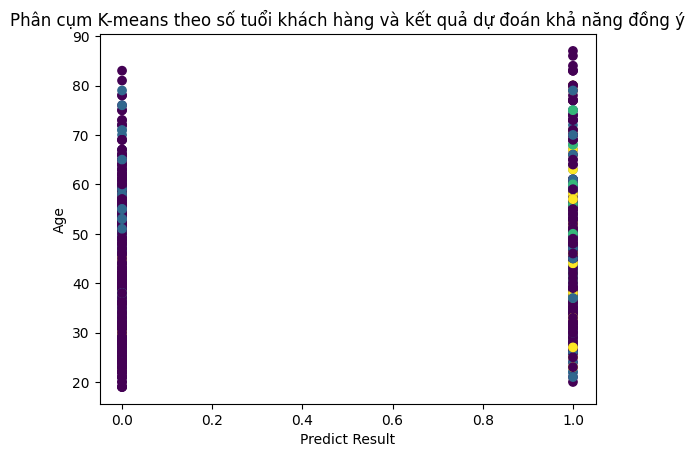

In [ ]:
plt.scatter(nb_kmeans['new_y'], nb_kmeans['age'], c=nb_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Predict Result')
plt.ylabel('Age')
plt.title('Phân cụm K-means theo số tuổi khách hàng và kết quả dự đoán khả năng đồng ý')
plt.show()

# Support Vector Machine (SVM)

kernel = 'rbf'

In [ ]:
X = df_train.copy(deep=True)
Y = label

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,False,2143,True,False,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,False,29,True,False,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,False,2,True,True,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,False,1506,True,False,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,False,1,False,False,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,False,825,False,False,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,False,1729,False,False,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,False,5715,False,False,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,False,668,False,False,17,nov,508,4,-1,0,unknown


In [ ]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
categorical_cols = [col for col in df_train.columns if df_train[col].dtype=='O']
print(categorical_cols)

['job', 'marital', 'education', 'month', 'poutcome']


In [ ]:
le = LabelEncoder()
for col in categorical_cols:
  X[col] = le.fit_transform(X[col])

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,False,2143,True,False,5,8,261,1,-1,0,3
1,44,9,2,1,False,29,True,False,5,8,151,1,-1,0,3
2,33,2,1,1,False,2,True,True,5,8,76,1,-1,0,3
3,47,1,1,3,False,1506,True,False,5,8,92,1,-1,0,3
4,33,11,2,3,False,1,False,False,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,False,825,False,False,17,9,977,3,-1,0,3
45207,71,5,0,0,False,1729,False,False,17,9,456,2,-1,0,3
45208,72,5,1,1,False,5715,False,False,17,9,1127,5,184,3,2
45209,57,1,1,1,False,668,False,False,17,9,508,4,-1,0,3


In [ ]:
svm_test = df_test.copy(deep=True)
enc_list = []
for col in categorical_cols:
  enc = {}
  for x in range(0, len(df_train[col].unique())):
    enc[df_train[col].unique()[x]] = X[col].unique()[x]
  enc_list.append(enc)

print(enc_list[0])

{'management': 4, 'technician': 9, 'entrepreneur': 2, 'blue-collar': 1, 'unknown': 11, 'retired': 5, 'admin.': 0, 'services': 7, 'self-employed': 6, 'unemployed': 10, 'housemaid': 3, 'student': 8}


In [ ]:
svm_test = df_test.copy(deep=True)
for col in range(0, len(categorical_cols)):
  for r in range(0, len(svm_test[categorical_cols[col]])):
    svm_test.at[r, categorical_cols[col]] = enc_list[col][svm_test.at[r, categorical_cols[col]]]

In [ ]:
svm_test

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,False,1787,False,False,19,10,79,1,-1,0,3
1,33,7,1,1,False,4789,True,True,11,8,220,1,339,4,0
2,35,4,2,2,False,1350,True,False,16,0,185,1,330,1,0
3,30,4,1,2,False,1476,True,True,3,6,199,4,-1,0,3
4,59,1,1,1,False,0,True,False,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,False,-333,True,False,30,5,329,5,-1,0,3
4517,57,6,1,2,True,-3313,True,True,9,8,153,1,-1,0,3
4518,57,9,1,1,False,295,False,False,19,1,151,11,-1,0,3
4519,28,1,1,1,False,1137,False,False,6,3,129,4,211,3,1


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, Y)
svm.SVC()

SVC()

In [ ]:
svm_result = clf.predict(svm_test)

In [ ]:
svm_result

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
svm_test = df_test.copy(deep = True)
svm_test.insert(15, 'new_y', svm_result, True)
svm_test

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,new_y
0,30,unemployed,married,primary,False,1787,False,False,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,False,4789,True,True,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,False,1350,True,False,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,False,1476,True,True,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,False,0,True,False,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,False,-333,True,False,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,True,-3313,True,True,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,False,295,False,False,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,False,1137,False,False,6,feb,129,4,211,3,other,no


In [ ]:
svm_kmeans = svm_test.copy(deep = True)
le = LabelEncoder()
for col in categorical_cols:
  svm_kmeans[col] = le.fit_transform(svm_kmeans[col])
svm_kmeans['new_y'] = le.fit_transform(svm_kmeans['new_y'])

In [ ]:
svm_kmeans

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,new_y
0,30,10,1,0,False,1787,False,False,19,10,79,1,-1,0,3,0
1,33,7,1,1,False,4789,True,True,11,8,220,1,339,4,0,0
2,35,4,2,2,False,1350,True,False,16,0,185,1,330,1,0,0
3,30,4,1,2,False,1476,True,True,3,6,199,4,-1,0,3,0
4,59,1,1,1,False,0,True,False,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,False,-333,True,False,30,5,329,5,-1,0,3,0
4517,57,6,1,2,True,-3313,True,True,9,8,153,1,-1,0,3,0
4518,57,9,1,1,False,295,False,False,19,1,151,11,-1,0,3,0
4519,28,1,1,1,False,1137,False,False,6,3,129,4,211,3,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

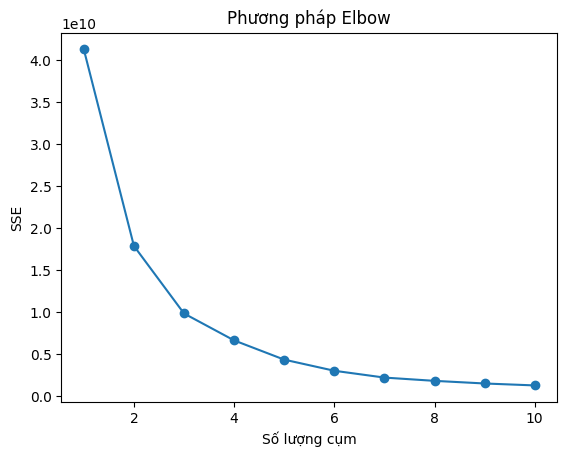

In [ ]:
max_clusters = 10  # Số cụm tối đa muốn xem
sse = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(svm_kmeans)
    sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse, marker='o')
plt.xlabel('Số lượng cụm')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow')
plt.show()

In [ ]:
# Số cụm tối ưu dựa trên biểu đồ Elbow
num_clusters = 4

# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(svm_kmeans)

# Gán nhãn cụm cho dữ liệu
svm_kmeans['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


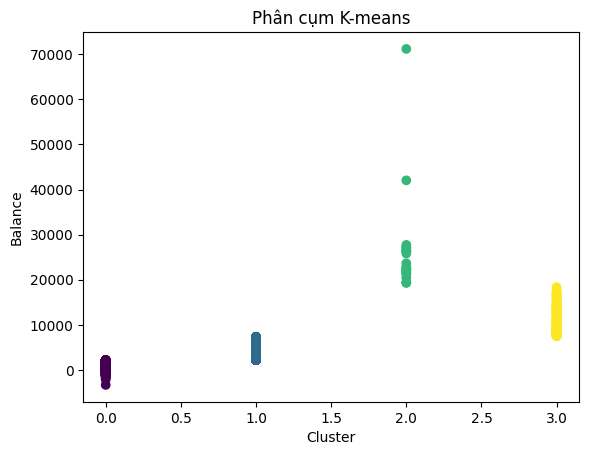

In [ ]:
plt.scatter(svm_kmeans['Cluster'], svm_kmeans['balance'], c=svm_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.title('Phân cụm K-means')
plt.show()

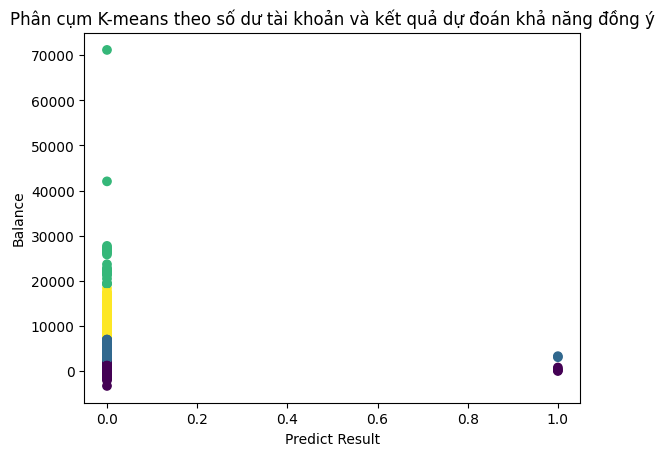

In [ ]:
plt.scatter(svm_kmeans['new_y'], svm_kmeans['balance'], c=svm_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Predict Result')
plt.ylabel('Balance')
plt.title('Phân cụm K-means theo số dư tài khoản và kết quả dự đoán khả năng đồng ý')
plt.show()

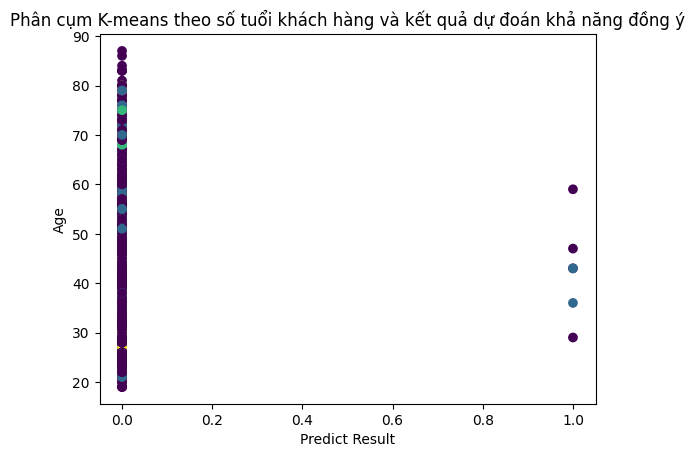

In [ ]:
plt.scatter(svm_kmeans['new_y'], svm_kmeans['age'], c=svm_kmeans['Cluster'], cmap='viridis')
plt.xlabel('Predict Result')
plt.ylabel('Age')
plt.title('Phân cụm K-means theo số tuổi khách hàng và kết quả dự đoán khả năng đồng ý')
plt.show()

# Kiểm tra độ chính xác của các thuật toán phân lớp bằng ma trận sai lầm

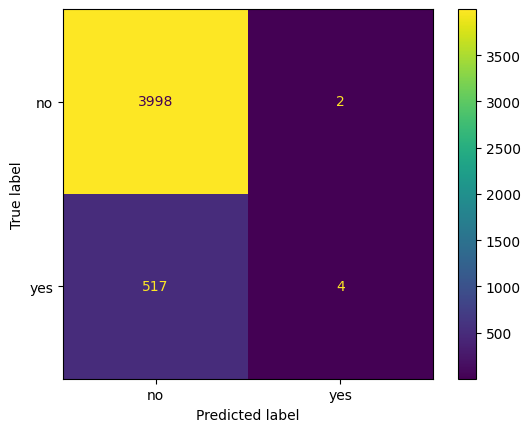

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(label_test, svm_result)
plt.show()

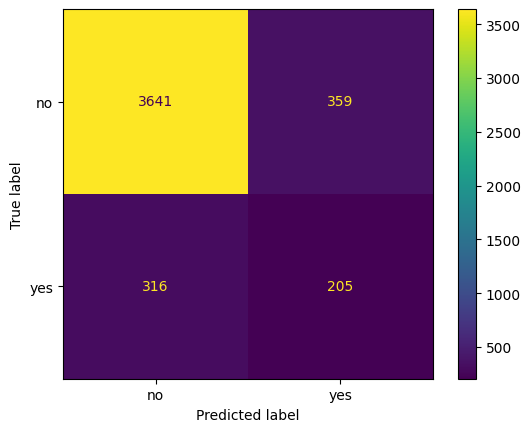

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(label_test, result_nb)
plt.show()